# Diabetes

Tugas Machine Learning Minggu 2 Azmi Taqiuddin Syah

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
# Baca dataset
data = pd.read_csv('CreditDataset.csv')

# Pisahkan fitur (X) dan target (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [78]:
le = LabelEncoder()
y = le.fit_transform(y)

In [79]:
# Ubah fitur kategorikal menjadi numerik menggunakan one-hot encoding
X = pd.get_dummies(X)

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
def evaluate_model(y_true, y_pred, y_pred_proba):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    
    # Gunakan probabilitas kelas positif untuk AUC-ROC
    y_pred_proba_pos = y_pred_proba[:, 1]
    print(f"AUC-ROC: {roc_auc_score(y_true, y_pred_proba_pos):.4f}")
    
    # Hitung dan gambar kurva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba_pos)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

In [82]:
# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_pred_proba = dt_model.predict_proba(X_test_scaled)


Decision Tree Metrics:
Accuracy: 0.7000
Precision: 0.6971
Recall: 0.7000
F1-score: 0.6985
AUC-ROC: 0.6345


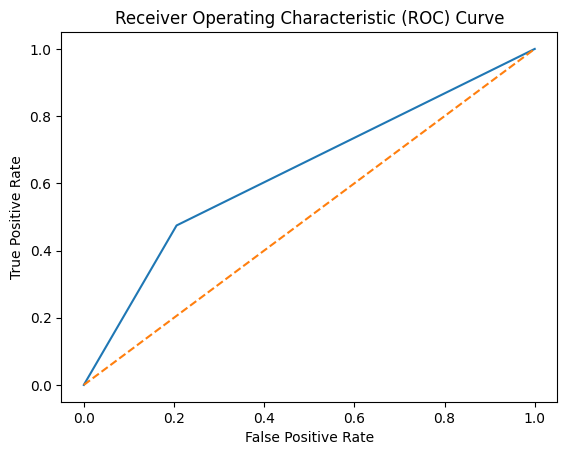

In [83]:
print("Decision Tree Metrics:")
evaluate_model(y_test, dt_pred, dt_pred_proba)


In [84]:
# Model k-NN (dengan k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_pred_proba = knn_model.predict_proba(X_test_scaled)


k-NN Metrics:
Accuracy: 0.7500
Precision: 0.7341
Recall: 0.7500
F1-score: 0.7350
AUC-ROC: 0.7295


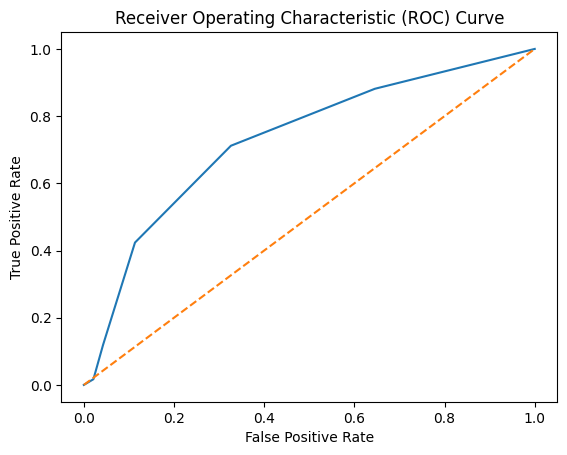

In [85]:
print("\nk-NN Metrics:")
evaluate_model(y_test, knn_pred, knn_pred_proba)

In [86]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



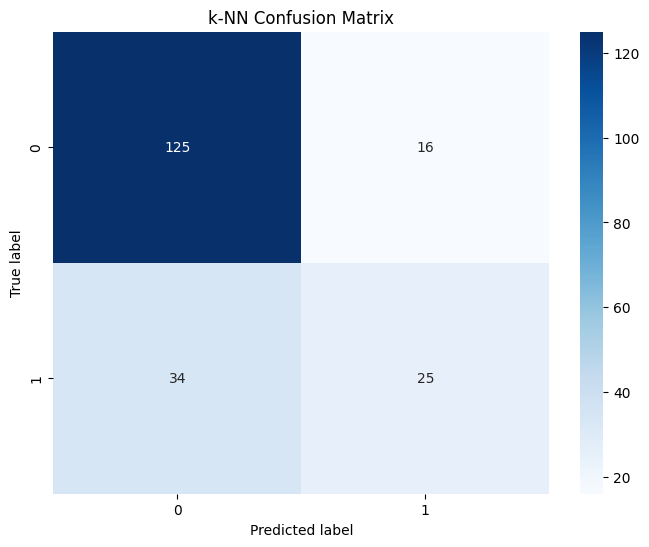

In [88]:
plot_confusion_matrix(y_test, knn_pred, "k-NN Confusion Matrix")